# Pipeline para la segmentación de las células en 3D

En este caso segmentaremos tres secciones de tres células clasificadas como 3/3: Femur 4, points 10; Humerus 6, points 3; y Femur 7, points 6 como elementos 3D. Para ello unificaremos cada una de las secciones para que sean un objeto 3D y trabajaremos con un elemento estructural 3D.

In [1]:
import os
import skimage.io
import pandas as pd
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import numpy as np
from skimage.filters import threshold_otsu, threshold_li
from skimage.morphology import erosion, dilation, opening, closing, ball

def hsc_segmentation(folder, choice, xpos, ypos, surrpix, threshold_method):
    red_vector = [0] * 3
    blue_vector = [0] * 3
    white_vector = [0] * 3
    segmented_choice = [0] * 3
    j = 0
    k = 0
    m = 0
    for i in os.listdir(folder):
        if "red" in i:
            img_now = skimage.io.imread(folder + i)
            red_vector[j] = img_now[(ypos-surrpix):(ypos+surrpix),(xpos-surrpix):(xpos+surrpix)]
            j += 1
        if "white" in i:
            img_now = skimage.io.imread(folder + i)
            white_vector[k] = img_now[(ypos-surrpix):(ypos+surrpix),(xpos-surrpix):(xpos+surrpix)]
            k += 1
        if "blue" in i:
            img_now = skimage.io.imread(folder + i)
            blue_vector[m] = img_now[(ypos-surrpix):(ypos+surrpix),(xpos-surrpix):(xpos+surrpix)]
            m += 1
    # Unificamos las capas en un único array de Numpy para que sean un objeto 3D
    red_3d = np.array([red_vector[0],red_vector[1],red_vector[2]])
    blue_3d = np.array([blue_vector[0],blue_vector[1],blue_vector[2]])
    white_3d = np.array([white_vector[0],white_vector[1],white_vector[2]]) 
    # Generamos un elemento estructural 3D con scikit-image
    SE_3D = ball(3)
    if choice == "red":
        element_choice = red_3d
    if choice == "blue":
        element_choice = blue_3d
    if choice == "white":
        element_choice = blue_3d
    dilated_mask = dilation(element_choice, selem=SE_3D)
    eroded_mask = erosion(dilated_mask, selem=SE_3D)
    if threshold_method == "otsu":
        for l in range(0,3,1):
            thresh = threshold_otsu(eroded_mask[l,:,:])
            segmented = eroded_mask[l,:,:] > thresh
            segmented_choice[l] = segmented
    if threshold_method == "li":
        for l in range(0,3,1):
            thresh = threshold_li(eroded_mask[l,:,:])
            segmented = eroded_mask[l,:,:] > thresh
            segmented_choice[l] = segmented
    plt.figure(figsize=(20,10))
    plt.subplot(2,3,1)
    plt.imshow(element_choice[0,:,:],cmap="gray")
    plt.subplot(2,3,2)
    plt.imshow(element_choice[1,:,:],cmap="gray")
    plt.subplot(2,3,3)
    plt.imshow(element_choice[2,:,:],cmap="gray")
    plt.subplot(2,3,4)
    plt.imshow(segmented_choice[0],cmap="gray")
    plt.subplot(2,3,5)
    plt.imshow(segmented_choice[1],cmap="gray")
    plt.subplot(2,3,6)
    plt.imshow(segmented_choice[2],cmap="gray")
    plt.show()

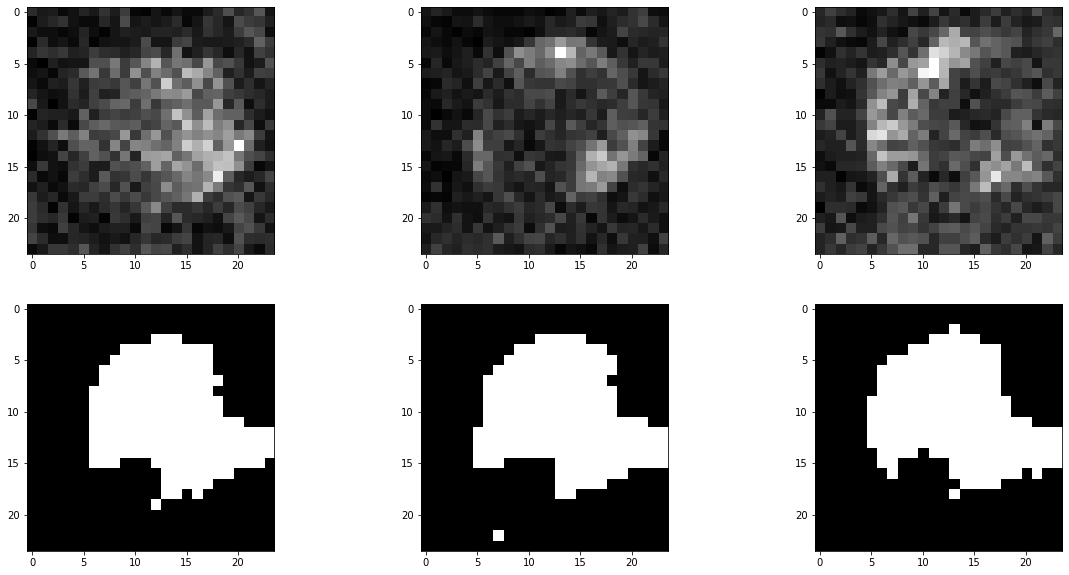

In [21]:
hsc_segmentation("C:/Users/cdedi/Desktop/Sample/Femur 4 points 10/", "red", 547, 855, 12, "otsu")

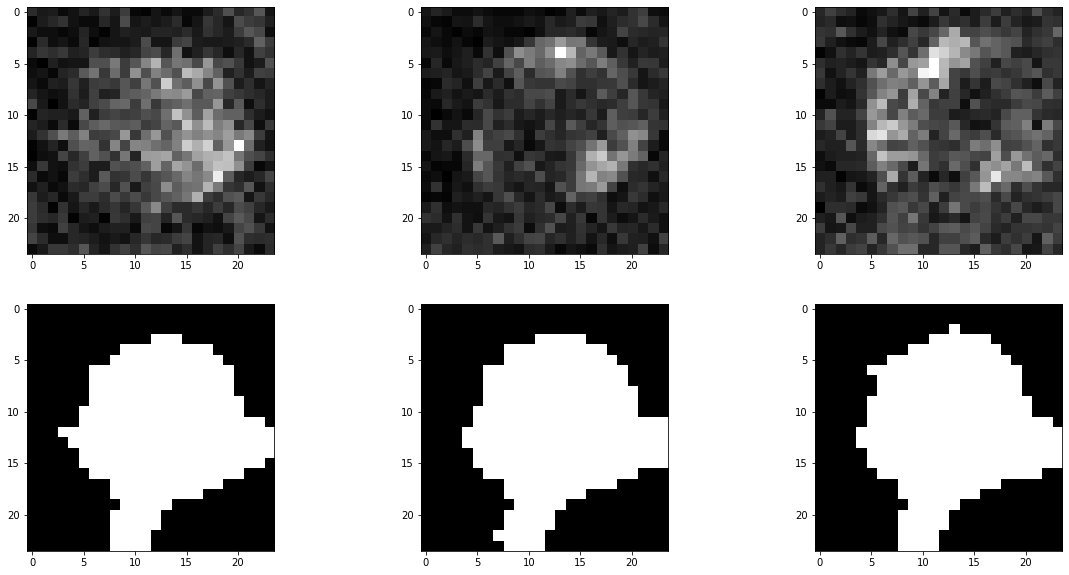

In [22]:
hsc_segmentation("C:/Users/cdedi/Desktop/Sample/Femur 4 points 10/", "red", 547, 855, 12, "li")

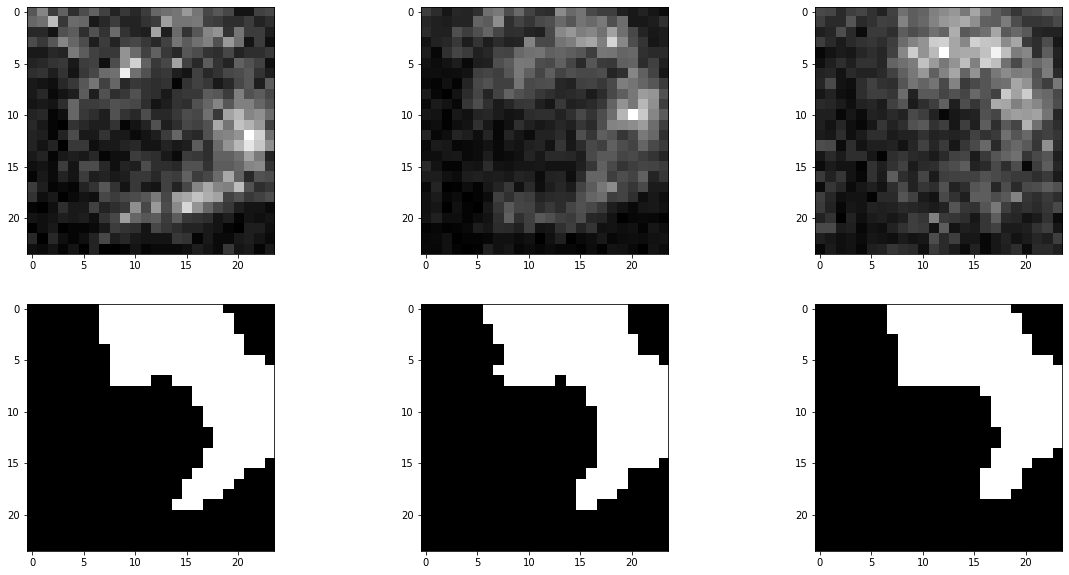

In [16]:
hsc_segmentation("C:/Users/cdedi/Desktop/Sample/Humerus 6 points 3/", "red", 420, 144, 12, "otsu")

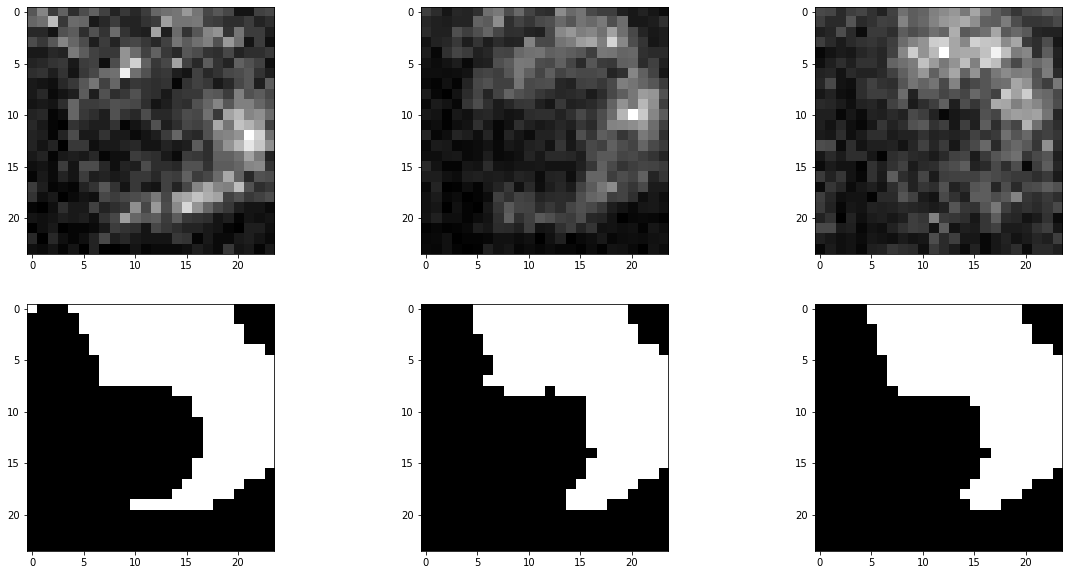

In [17]:
hsc_segmentation("C:/Users/cdedi/Desktop/Sample/Humerus 6 points 3/", "red", 420, 144, 12, "li")

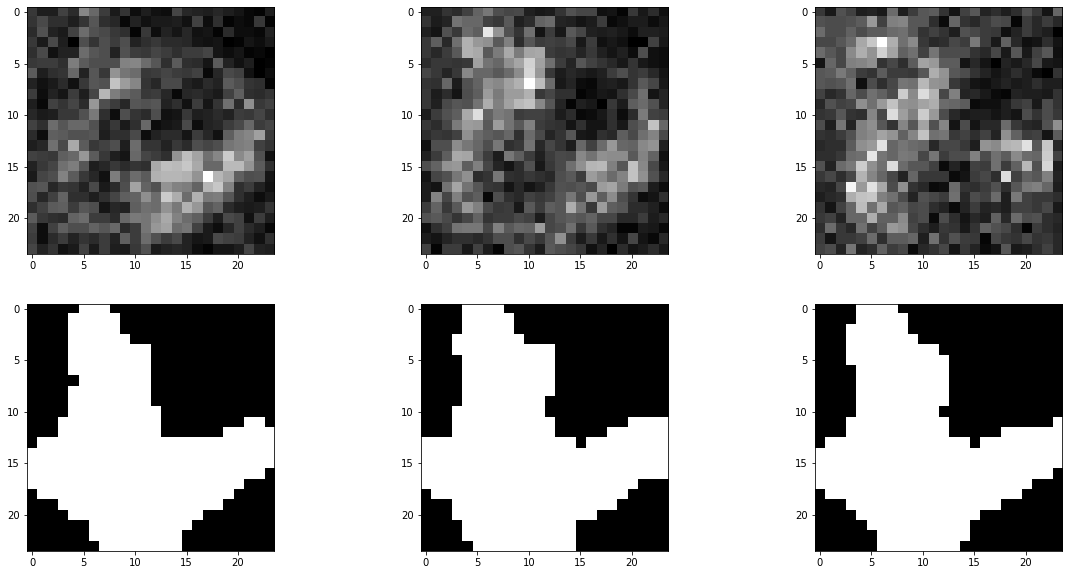

In [18]:
hsc_segmentation("C:/Users/cdedi/Desktop/Sample/Femur 7 points 6/", "red", 939, 688, 12, "otsu")

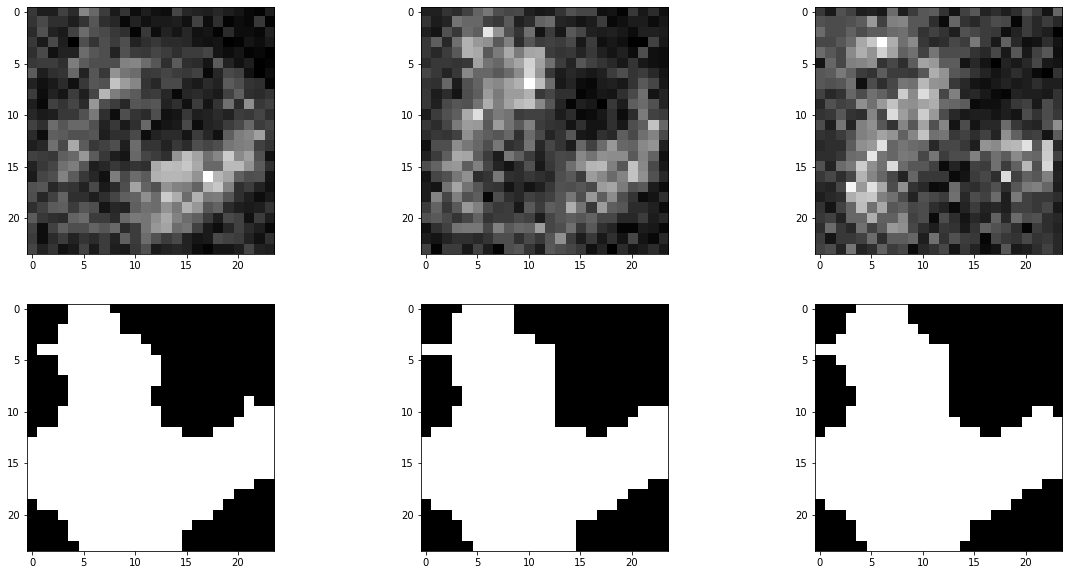

In [19]:
hsc_segmentation("C:/Users/cdedi/Desktop/Sample/Femur 7 points 6/", "red", 939, 688, 12, "li")